In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [38]:
#import data , data have been collected of different resources and put in one file
data=pd.read_csv('S&P.csv',index_col=0,parse_dates=True,na_values=["",".","0","null"])
data.head(3)

,S&P,1YTBILL,3MTBILL,6MTBILL,OILB,OILT,FED,USD/EUR,GOLD,USD/CNY,USD/GBP
Date,,,,,,,,,,,
2009-01-02,931.799988,0.38,0.08,0.28,42.94,46.17,0.08,0.7176,869.75,6.80,0.6896
2009-01-05,927.450012,0.41,0.14,0.32,45.84,48.61,0.11,0.7334,860.00,6.82,0.6865
2009-01-06,934.700012,0.42,0.14,0.31,48.89,48.56,0.09,0.7476,844.00,6.83,0.6809


In [39]:
# information about data and also can find out if there are any missing data or not
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2767 entries, 2009-01-02 to 2019-12-30
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P      2767 non-null   float64
 1   1YTBILL  2746 non-null   float64
 2   3MTBILL  2736 non-null   float64
 3   6MTBILL  2746 non-null   float64
 4   OILB     2752 non-null   float64
 5   OILT     2761 non-null   float64
 6   FED      2766 non-null   float64
 7   USD/EUR  2718 non-null   float64
 8   GOLD     2716 non-null   float64
 9   USD/CNY  2761 non-null   float64
 10  USD/GBP  2718 non-null   float64
dtypes: float64(11)
memory usage: 259.4 KB


In [40]:
#check correlation between FTSE100 and inputs
corr=data.corr()
corr

,S&P,1YTBILL,3MTBILL,6MTBILL,OILB,OILT,FED,USD/EUR,GOLD,USD/CNY,USD/GBP
S&P,1.000000,0.772188,0.786958,0.785081,-0.401122,-0.447292,0.801194,0.738190,-0.002773,0.178569,0.742263
1YTBILL,0.772188,1.000000,0.984906,0.994850,-0.410710,-0.451536,0.971776,0.513974,-0.130463,0.526192,0.778590
3MTBILL,0.786958,0.984906,1.000000,0.996555,-0.329345,-0.378659,0.994356,0.490485,-0.033128,0.502027,0.763354
6MTBILL,0.785081,0.994850,0.996555,1.000000,-0.370364,-0.417303,0.987697,0.507199,-0.073953,0.511921,0.775645
OILB,-0.401122,-0.410710,-0.329345,-0.370364,1.000000,0.973713,-0.341094,-0.711878,0.643472,-0.529334,-0.626219
OILT,-0.447292,-0.451536,-0.378659,-0.417303,0.973713,1.000000,-0.392289,-0.763903,0.519507,-0.504387,-0.665344
FED,0.801194,0.971776,0.994356,0.987697,-0.341094,-0.392289,1.000000,0.514469,-0.016524,0.511294,0.778719
USD/EUR,0.738190,0.513974,0.490485,0.507199,-0.711878,-0.763903,0.514469,1.000000,-0.158504,0.287996,0.780883
GOLD,-0.002773,-0.130463,-0.033128,-0.073953,0.643472,0.519507,-0.016524,-0.158504,1.000000,-0.322429,-0.121290
USD/CNY,0.178569,0.526192,0.502027,0.511921,-0.529334,-0.504387,0.511294,0.287996,-0.322429,1.000000,0.628097


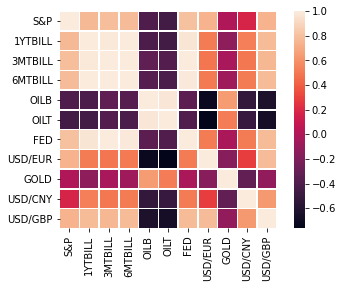

In [41]:
# visualize correlation between data
heat=sns.heatmap(corr,linewidth=0.5,square=True)

In [42]:
#sort correlation
corr['S&P'].sort_values(ascending=False)

S&P        1.000000
FED        0.801194
3MTBILL    0.786958
6MTBILL    0.785081
1YTBILL    0.772188
USD/GBP    0.742263
USD/EUR    0.738190
USD/CNY    0.178569
GOLD      -0.002773
OILB      -0.401122
OILT      -0.447292
Name: S&P, dtype: float64

In [43]:
#remove outputs which have weak correlation
data.drop(['GOLD','USD/CNY','OILB'],axis=1,inplace=True)
data.head(3)

,S&P,1YTBILL,3MTBILL,6MTBILL,OILT,FED,USD/EUR,USD/GBP
Date,,,,,,,,
2009-01-02,931.799988,0.38,0.08,0.28,46.17,0.08,0.7176,0.6896
2009-01-05,927.450012,0.41,0.14,0.32,48.61,0.11,0.7334,0.6865
2009-01-06,934.700012,0.42,0.14,0.31,48.56,0.09,0.7476,0.6809


In [44]:
# remove missing data
data.dropna(inplace=True)

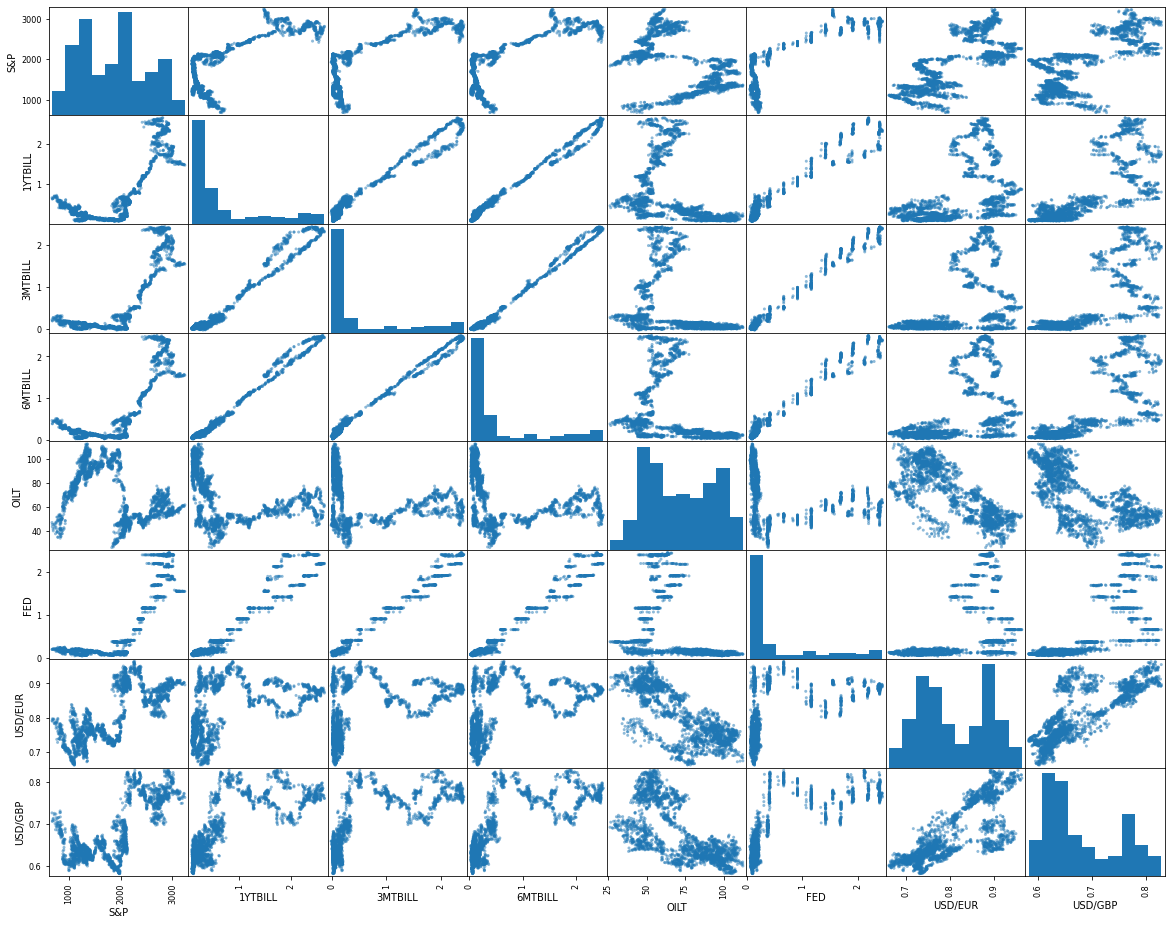

In [45]:
# visualize correlation between data
pd.plotting.scatter_matrix(data,figsize=(20,16))
plt.show()

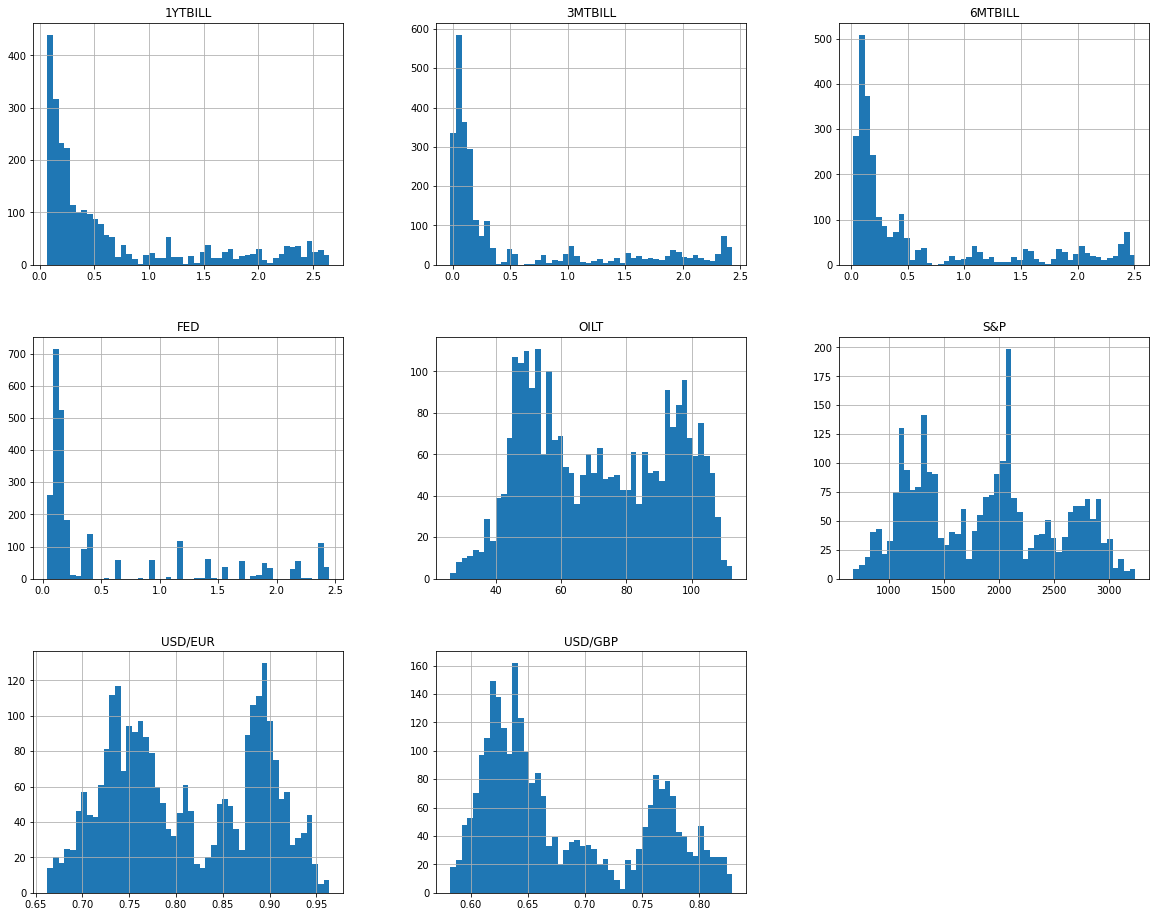

In [46]:
# each data distribution
data.hist(bins=50,figsize=(20,16))
plt.show()

In [47]:
# categorize output (S&P 500) into two categories, 0 for downward and 1 for upward trend,use MACD indicator for categorizing
mean_12=data['S&P'].rolling(window=12).mean()
mean_26=data['S&P'].rolling(window=26).mean()
mean_12=mean_12.iloc[27:]
mean_26=mean_26.iloc[27:]
data=data.iloc[27:,:]
data['target']=0
for i in range(len(mean_12)):
    if mean_12.iloc[i]<mean_26.iloc[i]:
        data['target'][i]=0
    else:
        data['target'][i]=1
        

C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [48]:
# remove FTSE 100 price column, the output is target column
data=data.iloc[:,1:]

In [49]:
#define X and y,there are 5 inputs and 1 output
X=data.iloc[:,:7]
y=data.iloc[:,7]

In [50]:
X

,1YTBILL,3MTBILL,6MTBILL,OILT,FED,USD/EUR,USD/GBP
Date,,,,,,,
2009-02-11,0.59,0.30,0.45,35.93,0.22,0.7751,0.6968
2009-02-12,0.57,0.29,0.42,34.03,0.23,0.7828,0.7019
2009-02-13,0.60,0.29,0.45,37.63,0.22,0.7745,0.6928
2009-02-17,0.59,0.32,0.47,34.96,0.25,0.7952,0.7015
2009-02-18,0.62,0.31,0.49,34.67,0.23,0.7981,0.7047
...,...,...,...,...,...,...,...
2019-12-19,1.48,1.54,1.53,61.30,1.55,0.8997,0.7675
2019-12-20,1.48,1.55,1.54,60.43,1.55,0.9020,0.7663
2019-12-23,1.49,1.56,1.56,60.51,1.55,0.9020,0.7736


In [51]:
#split data 80% for train and 20% for test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [52]:
#distribution of categories in train set
y_train.value_counts()

1    1422
0     701
Name: target, dtype: int64

In [53]:
#distribution of categories in test set
y_test.value_counts()

1    355
0    176
Name: target, dtype: int64

In [54]:
# standardize the inputs
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [55]:
X_train

array([[ 0.69353646,  0.68473087,  0.71005368, ...,  0.80062813,
         0.2987902 ,  1.12381883],
       [-0.69631879, -0.55686657, -0.60091685, ..., -0.57493544,
        -0.58229716, -0.92993224],
       [ 1.97647978,  1.67266862,  1.80915019, ...,  1.53607795,
         0.19362402,  0.63295776],
       ...,
       [-0.80323074, -0.67702116, -0.74658024, ..., -0.67027153,
        -0.92088094, -0.93721504],
       [-0.78986674, -0.65032014, -0.72009599, ..., -0.65665209,
        -0.9888542 , -1.23144037],
       [-0.65622682, -0.55686657, -0.61415898, ..., -0.60217433,
        -0.12828708, -0.69833903]])

# SVM model with rbf kernel

In [56]:
# use different range of hyperparameter to find out the best one
parameters={'C':[0.01,0.1,1,10,100,1000],'kernel':['rbf'],'gamma':[0.01,0.1,1,2,3,4,5]}

In [57]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf= GridSearchCV(svm.SVC(), parameters,verbose=0,cv=3)
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 2, 3, 4, 5],
                         'kernel': ['rbf']})

In [58]:
# best parameters through hyperparameter tuning
clf.best_params_

{'C': 100, 'gamma': 4, 'kernel': 'rbf'}

In [59]:
clf.best_score_

0.8822309591733992

In [60]:
# train model with best hyperparameter
classifier = svm.SVC(kernel =clf.best_params_['kernel'],C=clf.best_params_['C'],gamma=clf.best_params_['gamma']) 
classifier.fit(X_train, y_train)

SVC(C=100, gamma=4)

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [63]:
# accuracy of model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9058380414312618

In [64]:
# summary of accuracy and other metrics for model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       176
           1       0.92      0.94      0.93       355

    accuracy                           0.91       531
   macro avg       0.90      0.89      0.89       531
weighted avg       0.91      0.91      0.91       531



# SVM model with polynomial kernel

In [65]:
parameters={'C':[0.01,0.1,1,10,100,1000],'kernel':['poly'],'degree':[1,2,3,4,5,6,7,8]}

In [66]:
clf2= GridSearchCV(svm.SVC(), parameters,verbose=0,cv=3)
clf2.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8],
                         'kernel': ['poly']})

In [67]:
clf2.best_params_

{'C': 1000, 'degree': 8, 'kernel': 'poly'}

In [68]:
clf2.best_score_

0.7748556938018257

In [69]:
classifier2 = svm.SVC(kernel =clf2.best_params_['kernel'],C=clf2.best_params_['C'],degree=clf2.best_params_['degree']) 
classifier2.fit(X_train, y_train)

SVC(C=1000, degree=8, kernel='poly')

In [70]:
y_pred2 = classifier2.predict(X_test) 
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.7853107344632768

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.42      0.56       176
           1       0.77      0.97      0.86       355

    accuracy                           0.79       531
   macro avg       0.82      0.69      0.71       531
weighted avg       0.80      0.79      0.76       531

